In [2]:
%matplotlib inline
import matplotlib.pyplot as p
import numpy as np

import astropy.constants as cs
import os
import pyfits

import pipeline as pipe
import reduction as r
import data
import systematics
from data import view_frame_image as view

looking for spidermanrc file at /home/jacob/.spidermanrc
no spidermanrc file detected


# Setup for light-curve reduction

### 1) Download data
https://archive.stsci.edu/hst/search.php

\_ima files for all data

\_drz and \_flt files for the direct images (taken with Filters instead of Grism)

In [6]:
# data_dir: directory where the _ima files are stored
data_dir = '/home/jacob/hstscan/data/HD209458/GO12181/'

### 2) Produce visit information lists

In [7]:
# prop_str: first 4 characters of the files' names (proposal ID string)
data.make_input_image_lists(data_dir=data_dir, prop_str='ibh7')

['26']
Starting visit 26
Starting file 1 for visit 26
Completed file 1 for visit 26
Starting file 2 for visit 26
Completed file 2 for visit 26
Starting file 3 for visit 26
Completed file 3 for visit 26
Starting file 4 for visit 26
Completed file 4 for visit 26
Starting file 5 for visit 26
Completed file 5 for visit 26
Starting file 6 for visit 26
Completed file 6 for visit 26
Starting file 7 for visit 26
Completed file 7 for visit 26
Starting file 8 for visit 26
Completed file 8 for visit 26
Starting file 9 for visit 26
Completed file 9 for visit 26
Starting file 10 for visit 26
Completed file 10 for visit 26
Starting file 11 for visit 26
Completed file 11 for visit 26
Starting file 12 for visit 26
Completed file 12 for visit 26
Starting file 13 for visit 26
Completed file 13 for visit 26
Starting file 14 for visit 26
Completed file 14 for visit 26
Starting file 15 for visit 26
Completed file 15 for visit 26
Starting file 16 for visit 26
Completed file 16 for visit 26
Starting file 17 

At this point it makes sense to re-name the visit files to more appropriate names, e.g. visit_26.lis -> transit.lis

### 2) Fit direct image positions to produce position catalogues

Writing to: /home/jacob/hstscan/data/HD209458/GO12181/ibh726mdq_flt_1.cat
Shape (242, 271)


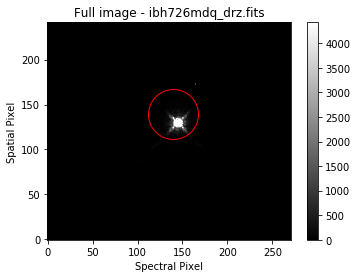

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  5.125e+05        0      inf     1693     True     None     None
x_mean        25.03        0       60  0.00366     True     None     None
x_stddev      1.107        0      inf 0.003654     True     None     None
y_mean        9.206        0       60 0.003578     True     None     None
y_stddev      1.082        0      inf 0.003575     True     None     None


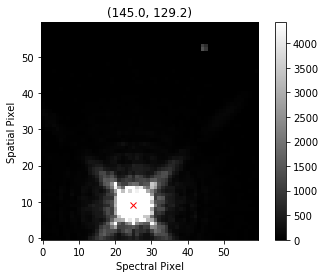

In [8]:
# gridsize: coarseness of initial search for source
# nstars: number of stars for which positions should be measured (in order of brightness)
# use_ima: use _ima files instead of _flt in case of problems
pipe.create_orbit_cats_gauss(data_dir=data_dir, gridsize=20, use_ima=False, nstars=1)

Now have everything you need to reduce an exposure and produce spectra

# Run data reduction on one exposure

########################################
###########Starting Reduction###########
########################################
Data reduction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see pipeline conf file: /home/jacob/hstscan/data/HD209458/GO12181/red.conf


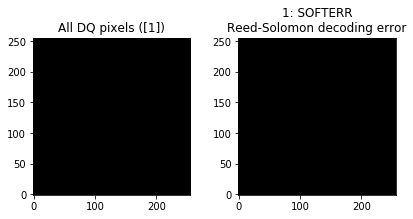

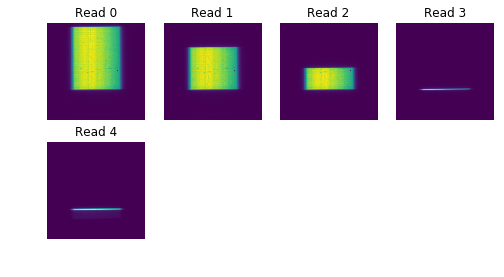

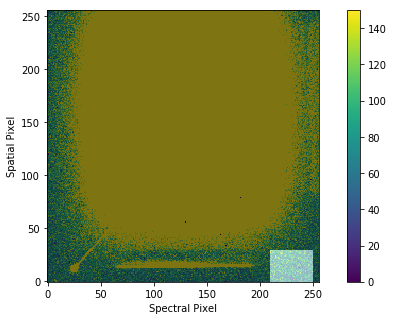

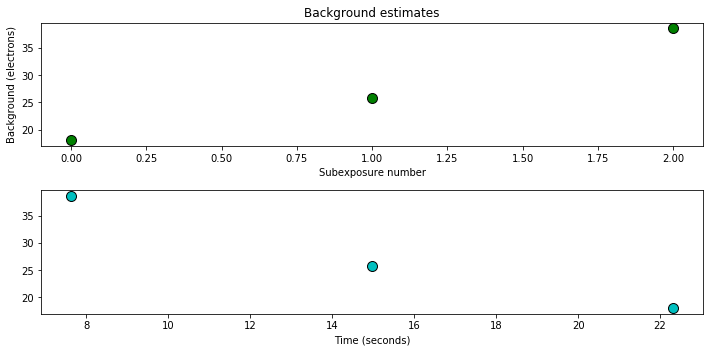

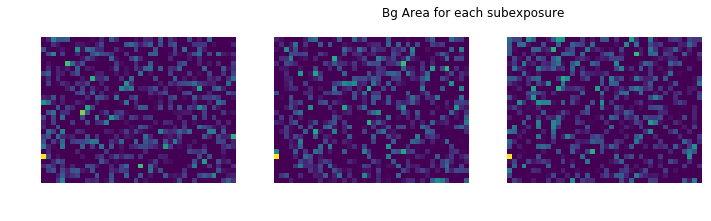

Forward scan
Catalogue used: /home/jacob/hstscan/data/HD209458/GO12181/ibh726mdq_flt_1.cat
Direct Image name: ibh726mdq
Catalogue file: ibh726mdq_ima.fits
Direct image location of (145.027022115,129.205914903)
applying postarg offset to yguess, 147.72 pix


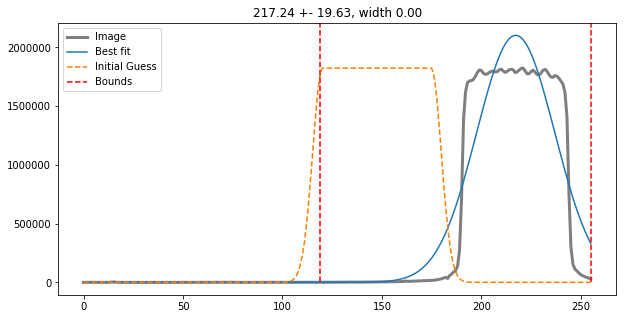

(256, 256)


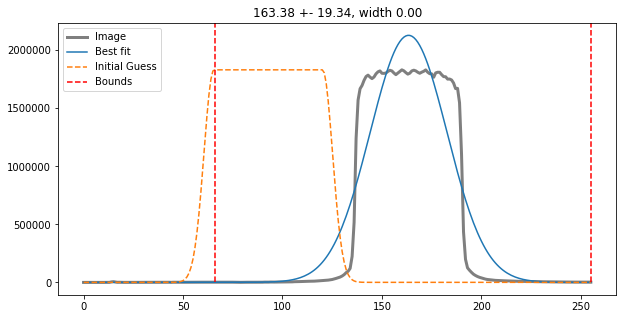

(256, 256)


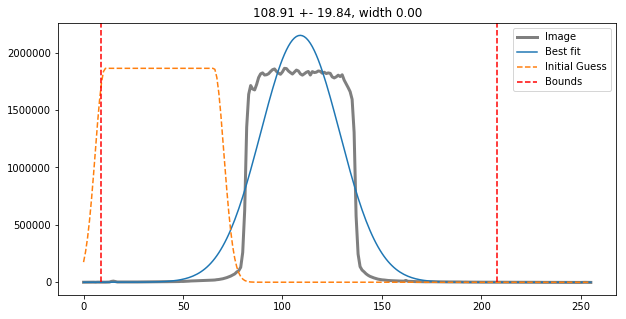

(256, 256)
applying postarg offset to yguess, 147.72 pix


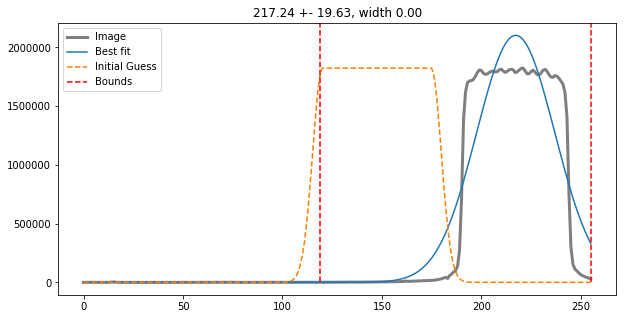

(256, 256)
(136, 22) (136, 111) 136 111


ValueError: operands could not be broadcast together with shapes (136,22) (136,111) 

In [31]:
fname = 'ibh726meq_ima.fits'
reload(pipe)
exp = pipe.reduce_exposure(fname, pdf=False, logger=False,
                           scan_rate=0.9, skip_start=1, remove_scan=False,
                           bg_x = 210, bg_y = 0, bg_w = 40, bg_h = 30,
                           tsiaras=False, exp_drift=True,
                           conf_file='/home/jacob/hstscan/data/HD209458/GO12181/red.conf', \
                           source_dir='/home/jacob/hstscan/data/HD209458/GO12181/')

exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='')